# Test libsurface.cpp - Image 3D

In [2]:
%load_ext autoreload
%autoreload 2

In [6]:
import numpy as np
np.random.seed(0)
N = 12
img1 = np.random.randint(0, 255, (N, N, N))
img2 = np.random.randint(0, 255, (N, N, N))

bool_img = np.random.randint(0, 2, (10,10, 10), dtype=bool)

In [7]:
from time import time
from sys import getsizeof
from nice.utils import print_dir
from nice.plot import matplotlib_plot, imshow_colorspace, line
import euchar.cppbinding.utils as u
import euchar.cppbinding.surface as s
from euchar.display import euler_curve_plot

In [8]:
import matplotlib.pyplot as plt
from matplotlib import cm
from numpy import arange, array, meshgrid, rot90
# For contours levels
from matplotlib.ticker import MaxNLocator

def plot_contour_surface(surface, nbins=15, dx=0.05, dy=0.05,
    title="Contourf", color_map='RdYlBu',
    xlabel="", ylabel="", xticks=[], yticks=[],
    figsize=(4,4), save=False, filename="--", dpi=220):
    """
    Plot contours of function

    Parameters
    ----------
    nbins
        int, regulates the smoothness of the contours
    color_map
        string, options are: 'viridis', 'plasma', 'inferno', 'magma',
        'Greys', 'OrRd', 'Reds',
        'binary', 'cool', 'hot', 'afmhot', 'coppet', 'PRGn', 'PiYG',
        'RdBu', 'RdYlBu', 'Spectral', 'coolwarm' and others.
    """

    # Contours levels
    levels = MaxNLocator(nbins=nbins).tick_values(surface.min(), surface.max())
    # Color map
    cmap = plt.get_cmap(color_map)

    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111)
    x = arange(surface.shape[1])
    y = arange(surface.shape[0])
    xx, yy = meshgrid(x, y)

    # Plot the surface.
    cf = ax.contourf(xx + dx/2.,
                     yy + dy/2.,
                     surface,
                     levels=levels,
                     cmap=cmap)
    fig.colorbar(cf, ax=ax)

    ax.set(xlabel=xlabel, ylabel=ylabel, xticks=xticks, yticks=yticks)
    #ax.xaxis.set_major_locator(ticker.FixedLocator((pos_list)))
    #ax.xaxis.set_major_formatter(ticker.FixedFormatter((name_list)))
    ax.set_title(title)
    fig.tight_layout()

    if save == True:
        plt.savefig(fname=filename, dpi=dpi)
    else:
        plt.show()

In [9]:
st = time()
v = np.load("C:\\Users\\44792\\data\\research\\vectors_euler_changes\\changes_3d.npy")
print(f"time: {time() - st:.2f} | size v: {getsizeof(v) / 1024 / 1024:.2f} Mb")

time: 0.19 | size v: 256.00 Mb


In [10]:
v2 = np.arange(10)
print(v2.dtype)
print(v.sum(), v2.sum())

int32
37748736 45


### Images

In [11]:
print(img1[0])
print("-"*60)
print(np.where(img1 == 255))

[[172  47 117 192  67 251 195 103   9 211  21 242]
 [ 36  87  70 216  88 140  58 193 230  39  87 174]
 [ 88  81 165  25  77  72   9 148 115 208 243 197]
 [254  79 175 192  82  99 216 177 243  29 147 147]
 [142 167  32 193   9 185 127  32  31 202 244 151]
 [163 254 203 114 183  28  34 128 128 164  53 133]
 [ 38 232 244  17  79 132 105  42 186  31 120   1]
 [ 65 231 169  57  35 102 119  11 174  82  91 128]
 [142  99  53 140 121 170  84 203  68   6 196  47]
 [127 244 131 204 100 180 232  78 143 148 227 186]
 [ 23 207 141 117  85  48  49  69 169 163 192  95]
 [197  94   0 113 178  36 162  48  93 131  98  42]]
------------------------------------------------------------
(array([2, 7, 8], dtype=int64), array([ 4, 11,  5], dtype=int64), array([9, 1, 0], dtype=int64))


In [12]:
print(img2[0])
print("-"*60)
print(np.where(img2 == 255))

[[228  56  21 167 234  74  29 241 157 189  58  24]
 [114  16 192 100 226 123  13   1 251   2  66 147]
 [244 250 204 158  39 213  77 177  26 115 140 241]
 [192   1 164  10 106  32 254  28 186 194 220  65]
 [205  83  47  81 164 199  53 198 137  15  18 157]
 [181 188  42 210 130  29 145  35 120  19 144  23]
 [140  99 109 184 194  20 131  81 172  38  42 202]
 [ 37 106  40 111  27 132 179 150 165  35  30   7]
 [216  88 239 143 138 147  77 231  56 229 231 146]
 [199  60  24 160 108  39 116 104 126 111 116 228]
 [234  16 180 218 232 208  46 224  94  84  23 143]
 [172  83 119  55  98 155  45 226  81 215 155  77]]
------------------------------------------------------------
(array([ 3,  4,  4,  4,  6,  7, 10, 10, 11], dtype=int64), array([ 1,  1,  2,  2,  7,  3,  3,  3, 11], dtype=int64), array([10, 10,  1, 11, 10,  3,  5, 11,  6], dtype=int64))


***

### Naive surface 3D images

In [13]:
st = time()
naive = s.naive_images_3d(img1, img2, 255, 255)
print(f"time: {time()-st:.2f}")

time: 46.52


In [14]:
naive = np.array(naive)

In [15]:
print(naive[-1,-1])

1


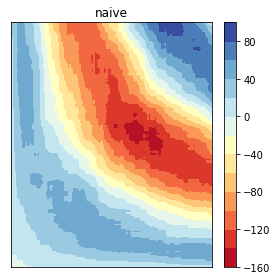

In [16]:
plot_contour_surface(np.array(naive), title="naive")

### Surface 3D images

In [17]:
st = time()
surf = np.array(s.images_3d(img1, img2, v, 255, 255))
print(f"time: {time() - st:.2f}")

time: 5.75


In [18]:
print(surf[-1,-1])

0


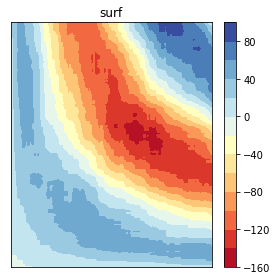

In [19]:
plot_contour_surface(np.array(surf), title="surf")

### Test equality

In [20]:
print(naive.shape, "\n", surf.shape)

(256, 256) 
 (256, 256)


In [21]:
np.all(naive == surf)

False

In [22]:
np.where(np.array(naive) != np.array(surf))

(array([255], dtype=int64), array([255], dtype=int64))

In [23]:
naive[-10:, -10:]

array([[57, 53, 49, 47, 41, 39, 36, 35, 31, 26],
       [56, 52, 48, 46, 40, 38, 35, 34, 30, 25],
       [52, 48, 44, 42, 36, 34, 31, 30, 26, 21],
       [50, 46, 42, 40, 34, 32, 29, 28, 24, 19],
       [49, 45, 41, 39, 33, 30, 27, 26, 22, 17],
       [47, 43, 39, 37, 31, 28, 25, 24, 20, 15],
       [43, 39, 34, 32, 26, 23, 20, 19, 15, 10],
       [40, 36, 31, 28, 21, 18, 15, 14, 10,  5],
       [38, 34, 29, 26, 19, 16, 13, 11,  7,  2],
       [37, 33, 28, 25, 18, 15, 12, 10,  6,  1]])

In [24]:
surf[-10:,-10:]

array([[57, 53, 49, 47, 41, 39, 36, 35, 31, 26],
       [56, 52, 48, 46, 40, 38, 35, 34, 30, 25],
       [52, 48, 44, 42, 36, 34, 31, 30, 26, 21],
       [50, 46, 42, 40, 34, 32, 29, 28, 24, 19],
       [49, 45, 41, 39, 33, 30, 27, 26, 22, 17],
       [47, 43, 39, 37, 31, 28, 25, 24, 20, 15],
       [43, 39, 34, 32, 26, 23, 20, 19, 15, 10],
       [40, 36, 31, 28, 21, 18, 15, 14, 10,  5],
       [38, 34, 29, 26, 19, 16, 13, 11,  7,  2],
       [37, 33, 28, 25, 18, 15, 12, 10,  6,  0]])

***

In [26]:
for i in range(4):
    N = 15
    np.random.seed(i)
    img1 = np.random.randint(0, 255, (N, N, N))
    img2 = np.random.randint(0, 255, (N, N, N))
    print("======", i)
    start_i = time()
    naive = np.array(s.naive_images_3d(img1, img2, 255, 255))
    inter_i = time()
    print(f"time naive: {inter_i - start_i:.2f} | ", end="")
    surf = np.array(s.images_3d(img1, img2, v, 255, 255))
    print(f"time surf: {time() - inter_i:.2f}", end = " ")
    print("\t --> Where different?",np.where(np.array(naive) != np.array(surf)), " || ", surf[-1, -1])

====== 0
time naive: 79.34 | time surf: 7.45 	 --> Where different? (array([], dtype=int64), array([], dtype=int64))  ||  1
====== 1
time naive: 77.60 | time surf: 7.96 	 --> Where different? (array([], dtype=int64), array([], dtype=int64))  ||  1
====== 2
time naive: 78.47 | time surf: 7.50 	 --> Where different? (array([], dtype=int64), array([], dtype=int64))  ||  1
====== 3
time naive: 76.97 | time surf: 7.12 	 --> Where different? (array([], dtype=int64), array([], dtype=int64))  ||  1
